# More Ways of Detecting Voice Gender

While speech processing has come a long way, the study of paralinguistic properties like emotion and gender has lagged behind. The state-of-the-art (i.e. VALLE, Tacotron) tends to focus on end-to-end pipelines rather than Statistical Parametric Speech Synthesis (SPSS) systems that explicitly represent speech properties like emotion and speaker recognition, conversion, and generation of speech. There remains work to be done to understand how paralinguistic information is represented in voice recordings. Using manifold learning and a neural network, I explore some ways gender is represented as a latent structure in human speech waveforms.

This project builds on Kory Becker's [Voice Gender](https://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/) project (github repository [here](https://github.com/primaryobjects/voice-gender)). I use the feature dataset she extracted from speech clips using the [warbleR](https://cran.r-project.org/web/packages/warbleR/index.html) package. As a Carnegie Mellon student, I was pleased to find many of the speech clips were sourced from projects conducted at CMU. ^_^

First, I load in the dataset and some of the libraries I'll be using:

In [112]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
voice = pd.read_csv("voice.csv")
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


Then I separate the predictor variables (mean frequency of waveform, frequency range, etc) from the label I'm trying to predict — gender.

In [140]:
voice_pred = voice.loc[:, voice.columns != "label"]

## Dimesionality Reduction

The dimensionality reduction algorithms I plan to use are **not** invariant to scaling, so I normalize the data. Otherwise, the Euclidean distance function would be dominated by certain features over others and fail to accurately represent the data.

In [ ]:
voice_pred_scaled = StandardScaler().fit_transform(voice_pred)

First, I use Uniform Manifold Approximation and Projection (UMAP), a novel dimensionality reduction algorithm that is most commonly used in the literature for visualizing single-cell RNA datasets. The manifold learning algorithm is quite adept at finding nonlinear projections of the data. It also scales particularly well compared to t-SNE, its older cousin. After reducing the speech datase to two dimensions, I plot the results.

In [120]:
Y = umap.UMAP(n_neighbors=10, min_dist=0.01).fit_transform(voice_pred_scaled)

In [145]:
# some helpful color stuff for matplotlib
import matplotlib.patches as mpatches

f = lambda x: '#0038A8' if x == 'male' else '#D60270'
gender_colors=[f(i) for i in voice.label]
male_patch = mpatches.Patch(color='#0038A8', label='male')
female_patch = mpatches.Patch(color='#D60270', label='female')

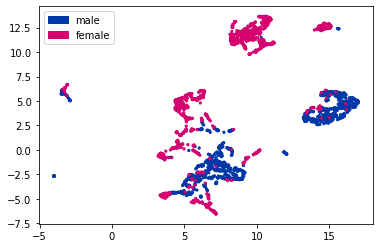

In [147]:
plt.scatter(Y[:,0], Y[:, 1], c=gender_colors, s=5)
plt.legend(handles=[male_patch, female_patch])

Ok, UMAP has done a decent job separating the voices by gender. It's worth noting that the algorithm is unsupervised, so the gendered property of voice seems to emerge as an underlying structure rather than one induced on the data. Of course, there are not just two uniform and distinct clusters — there is still overlap and variation. Put differently, voice does not reflect a simple mutually exclusive binary of speaker genders. Nevertheless, it does seem that gender is prominently represented in the fundamental structure of voice data.

Next, I use t-distributed stochastic neighbor embeddings (t-SNE). This is an older and more well-established dimensionality reduction algorithm than t-SNE. However, it does suffer from a larger runtime complexity. 

In [148]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=238)
voice_tsne = tsne.fit_transform(voice_pred_scaled)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


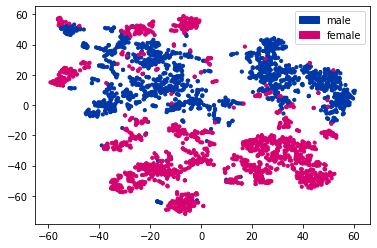

In [149]:
plt.scatter(voice_tsne[:,0], voice_tsne[:,1], c=gender_colors, s=10)
plt.legend(handles=[male_patch, female_patch])

# Neural Networks

Neural networks are also adept at finding latent structures in high-dimensional datasets. In fact, one [explanation](https://doi.org/10.1109/TNNLS.2015.2496947) for the effectiveness of deep learning essentially states that neural networks find the underlying manifold the data lies on much like older dimensionality reduction algorithms. 

The previous voice gender project author eschewed neural networks for algorithms with more easily explainable results. However, I think it may be worth seeing how well a neural network is able to classify the data just given the features extracted from the voice waveforms.

I import the relevant modules and train a neural network on the data:

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(voice_pred, voice.label, random_state=11523)
mlp_cl = MLPClassifier(hidden_layer_sizes=[15, 15, 15], random_state=12)
mlp_cl.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=[15, 15, 15], random_state=12)

In [126]:
print("In-sample Accuracy Rate:")
print(sum(mlp_cl.predict(X_train) == Y_train) / Y_train.shape[0])
print("Out-of-sample Accuracy Rate:")
print(sum(mlp_cl.predict(X_test) == Y_test) / Y_test.shape[0])

In-sample Accuracy Rate:
0.9419191919191919
Out-of-sample Accuracy Rate:
0.9330808080808081


It looks like we achieve a high accuracy rate - around 93%! Further work I'd like to do would examine what latent structure the neural net found.